In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("E:\\dataset\\train\\simple.1.jpg")
#imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (5,5), 0)

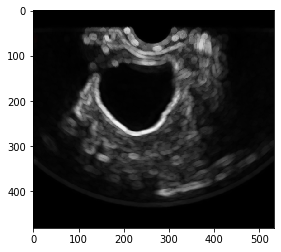

In [3]:
h, w = img.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

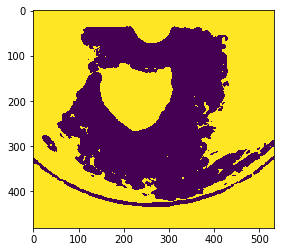

In [4]:
lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)
plt.imshow(binary)

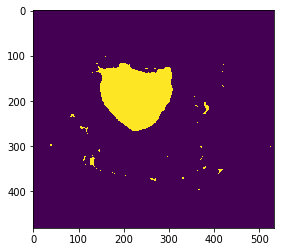

In [5]:
for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)

plt.imshow(binary)

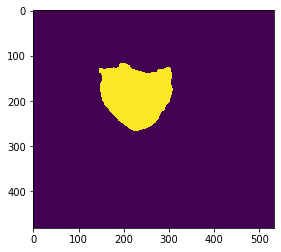

In [6]:
foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)
plt.imshow(foreground)

In [14]:
blur = cv2.GaussianBlur(foreground, (5,5), 0)

edged1 = cv2.Canny(blur, 50, 50)
edged1 = cv2.dilate(edged1, None, iterations=5)
edged1 = cv2.erode(edged1, None, iterations=0)
ret,thresh = cv2.threshold(edged1,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

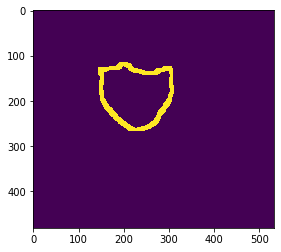

In [15]:
cnt = contours[0]
img = cv2.drawContours(image, [cnt], 0, (0,255,0), 3)
plt.imshow(img)

In [16]:
M = cv2.moments(cnt)
print (M)

{'m00': 20966.5, 'm10': 4763212.333333333, 'm01': 3899581.1666666665, 'm20': 1124169879.9166665, 'm11': 887818352.4583333, 'm02': 757384639.0833333, 'm30': 274544503313.6, 'm21': 209512451238.63333, 'm12': 172747652835.53333, 'm03': 153034621060.15, 'mu20': 42053564.2503047, 'mu11': 1903530.8190011978, 'mu02': 32097477.4005841, 'mu30': 45662373.22979736, 'mu21': -437971330.93497086, 'mu12': -24617205.858519554, 'mu03': 228176912.12097168, 'nu20': 0.0956645280766256, 'nu11': 0.004330200798086758, 'nu02': 0.07301616599489032, 'nu30': 0.000717370698070224, 'nu21': -0.006880671703733069, 'nu12': -0.000386744290805731, 'nu03': 0.0035847333187867246}


In [17]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

227 185


In [30]:
area = cv2.contourArea(cnt)
print(area)

20966.5


In [19]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

595.4873684644699


In [20]:
#It is the ratio of width to height of bounding rect of the object.
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

1.10062893081761


In [21]:
#Extent is the ratio of contour area to bounding rectangle area.
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.7535130278526505


In [22]:
#Solidity is the ratio of contour area to its convex hull area.
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.943035127962938


In [23]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

163.38719935995533


In [24]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print(x,y)
print(MA,ma)
print(angle)

227.564208984375 186.1891632080078
156.82579040527344 178.71353149414062
89.89395141601562


In [25]:
mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
#pixelpoints = np.transpose(np.nonzero(mask))
pixelpoints = cv2.findNonZero(mask)

In [26]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img,mask = mask)
print(min_val, max_val, min_loc, max_loc)

0.0 255.0 (190, 112) (190, 115)


In [27]:
mean_val = cv2.mean(img,mask = mask)
print(mean_val)

(67.85505676197654, 0.0, 0.0, 0.0)


In [28]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
print(leftmost,rightmost,topmost,bottommost)

(140, 125) (314, 183) (190, 112) (215, 270)
